In [1]:
import numpy as np, basic, local, curvedsky as cs, healpy as hp
from matplotlib.pyplot import *

In [2]:
T = hp.read_map('../data/lensing/S4BIRD/CMB_Lensed_Maps/CMB/cmb_sims_0002.fits',field=0)
Q = hp.read_map('../data/lensing/S4BIRD/CMB_Lensed_Maps/CMB/cmb_sims_0002.fits',field=1)
U = hp.read_map('../data/lensing/S4BIRD/CMB_Lensed_Maps/CMB/cmb_sims_0002.fits',field=2)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [3]:
nside = hp.get_nside(T)
lmax = 4096
l = np.linspace(0,lmax,lmax+1)
lfac = l*(l+1)/2/np.pi

In [4]:
Talm = cs.utils.hp_map2alm(nside,lmax,lmax,T)

In [5]:
Ealm, Balm = cs.utils.hp_map2alm_spin(nside,lmax,lmax,2,Q,U)

In [6]:
cl = {}
cl['TT'] = cs.utils.alm2cl(lmax,Talm)
cl['EE'] = cs.utils.alm2cl(lmax,Ealm)
cl['BB'] = cs.utils.alm2cl(lmax,Balm)

In [7]:
CL = {}
L, CL['TT'], CL['EE'], CL['BB'], CL['TE'] = np.loadtxt('../data/lensing/S4BIRD/CAMB/BBSims_lensed_dls.dat',skiprows=1,unpack=True)

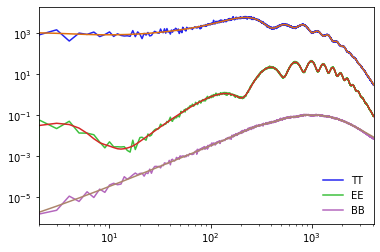

In [8]:
for c in ['TT','EE','BB']:
    xlim(2,lmax)
    loglog(l,cl[c]*lfac,label=c)
    loglog(L,CL[c])
legend()

In [9]:
cl['TE'] = cs.utils.alm2cl(lmax,Talm,Ealm)

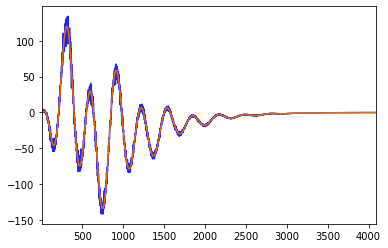

In [10]:
xlim(2,lmax)
plot(l,cl['TE']*lfac)
plot(L,CL['TE'])

In [11]:
palm = hp.read_alm('../data/lensing/S4BIRD/CMB_Lensed_Maps/MASS/phi_sims_0002.fits')

In [12]:
pmap = hp.sphtfunc.alm2map(palm,nside)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [13]:
Palm = cs.utils.hp_map2alm(nside,lmax,lmax,pmap)

In [14]:
PP = cs.utils.alm2cl(lmax,Palm)
TP = cs.utils.alm2cl(lmax,Talm,Palm)

In [15]:
L, __, __, __, pp, tp = np.loadtxt('../data/lensing/S4BIRD/CAMB/BBSims_scal_dls.dat',skiprows=1,unpack=True)

In [16]:
import cmb

In [17]:
ucl = cmb.read_camb_cls('../data/lensing/S4BIRD/CAMB/BBSims_scal_dls.dat',output='array')[:,:lmax+1]

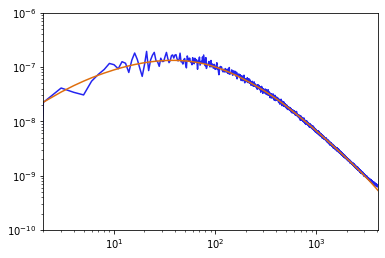

In [18]:
xlim(2,lmax)
ylim(1e-10,1e-6)
loglog(l,PP*(l*(l+1))**2/2/np.pi)
loglog(L[:lmax+1],pp[:lmax+1]/2.72e6**2/2/np.pi)

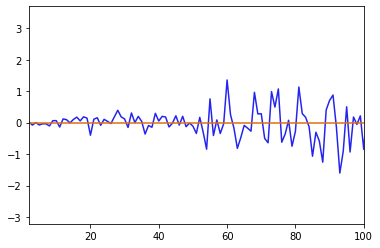

In [21]:
xlim(2,100)
plot(l,TP*(l*(l+1))**2)
plot(L[:lmax+1],tp[:lmax+1]/2.72e6**2/2/np.pi/L[:lmax+1])